<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/exp_highk_mosfet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

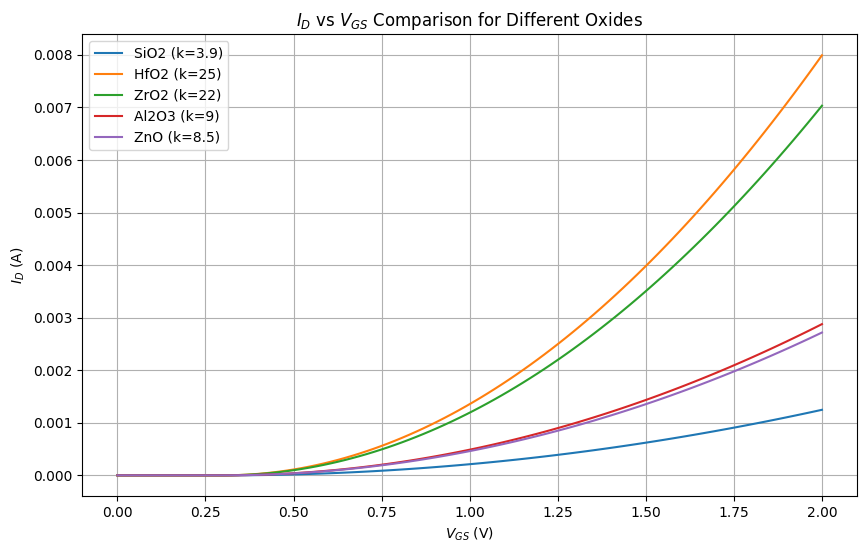

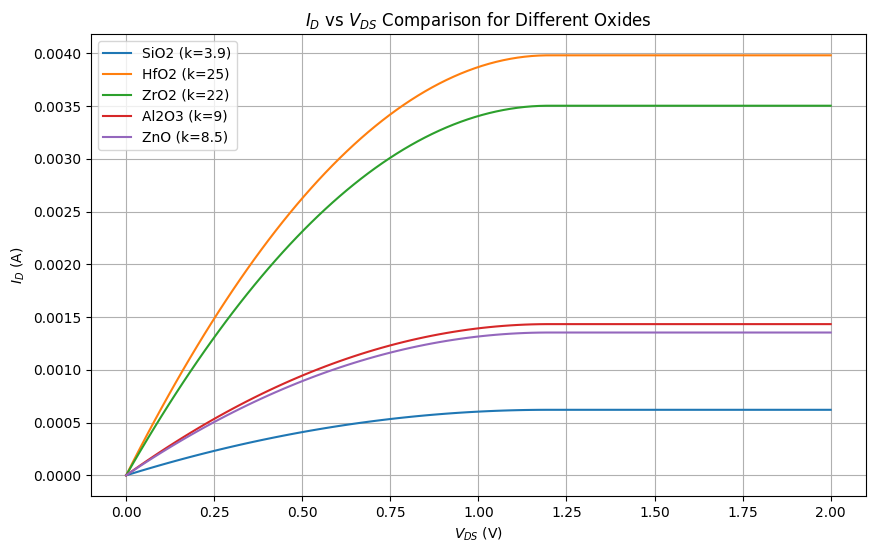

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.85e-12  # Permittivity of free space (F/m)
tox = 2e-9  # Oxide thickness (m)
mu_n = 500e-4  # Electron mobility (m^2/Vs)
W = 1e-6  # Channel width (m)
L = 1e-6  # Channel length (m)
Vth = 0.3  # Threshold voltage (V)
Vgs = np.linspace(0, 2, 100)  # Gate-to-source voltage (V)
Vds = np.linspace(0, 2, 100)  # Drain-to-source voltage (V)

# Relative permittivities of different oxides
oxides = {
    'SiO2': 3.9,
    'HfO2': 25,
    'ZrO2': 22,
    'Al2O3': 9,
    'ZnO': 8.5
}

# Function to calculate Id vs Vgs for a given oxide
def Id_vs_Vgs(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vgs)
    for i, Vg in enumerate(Vgs):
        if Vg > Vth:
            Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vg - Vth)**2  # Saturation region
        else:
            Id[i] = 0  # Below threshold, current is negligible
    return Id

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each oxide material and plot Id vs Vgs
for oxide, kappa in oxides.items():
    # Calculate Cox for each material
    Cox = (epsilon_0 * kappa) / tox

    # Calculate Id for each oxide
    Id_vgs = Id_vs_Vgs(Vgs, 2, Vth, mu_n, Cox, W, L)  # For Vds = 2V

    # Plot Id vs Vgs for this oxide
    plt.plot(Vgs, Id_vgs, label=f'{oxide} (k={kappa})')

# Plot settings
plt.title('$I_D$ vs $V_{GS}$ Comparison for Different Oxides')
plt.xlabel('$V_{GS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Function to calculate Id vs Vds for a given oxide
def Id_vs_Vds(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vds)
    for i, Vd in enumerate(Vds):
        if Vgs > Vth:
            if Vd < (Vgs - Vth):  # Triode region
                Id[i] = mu_n * Cox * (W/L) * ((Vgs - Vth) * Vd - 0.5 * Vd**2)
            else:  # Saturation region
                Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vgs - Vth)**2
        else:
            Id[i] = 0  # Below threshold
    return Id

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each oxide material and plot Id vs Vds
for oxide, kappa in oxides.items():
    # Calculate Cox for each material
    Cox = (epsilon_0 * kappa) / tox

    # Calculate Id for each oxide
    Id_vds = Id_vs_Vds(1.5, Vds, Vth, mu_n, Cox, W, L)  # For Vgs = 1.5V

    # Plot Id vs Vds for this oxide
    plt.plot(Vds, Id_vds, label=f'{oxide} (k={kappa})')

# Plot settings
plt.title('$I_D$ vs $V_{DS}$ Comparison for Different Oxides')
plt.xlabel('$V_{DS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
